In [59]:
# Import libraries
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
# NLTK VADER for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

finwiz_url = 'https://finviz.com/quote.ashx?t='

In [3]:
news_tables = {}
tickers = ['TSLA']

for ticker in tickers:
    url = finwiz_url + ticker
    req = Request(url=url,headers={'user-agent': 'my-app/0.0.1'}) 
    response = urlopen(req)    
    # Read the contents of the file into 'html'
    html = BeautifulSoup(response)
    # Find 'news-table' in the Soup and load it into 'news_table'
    news_table = html.find(id='news-table')
    # Add the table to our dictionary
    news_tables[ticker] = news_table

In [4]:
# Read one single day of headlines for 'AMZN' 
tsla = news_tables['TSLA']
# Get all the table rows tagged in HTML with <tr> into 'amzn_tr'
tsla_tr = tsla.findAll('tr')

# for i, table_row in enumerate(tsla_tr):
#     # Read the text of the element 'a' into 'link_text'
#     a_text = table_row.a.text
#     # Read the text of the element 'td' into 'data_text'
#     td_text = table_row.td.text
#     # Print the contents of 'link_text' and 'data_text' 
#     print(a_text)
#     print(td_text)
#     # Exit after printing 4 rows of data
#     if i == 3:
#         break

In [6]:
parsed_news = []

# Iterate through the news
for file_name, news_table in news_tables.items():
    # Iterate through all tr tags in 'news_table'
    for x in news_table.findAll('tr'):
        # read the text from each tr tag into text
        # get text from a only
        text = x.a.get_text() 
        # splite text in the td tag into a list 
        date_scrape = x.td.text.split()
        # if the length of 'date_scrape' is 1, load 'time' as the only element

        if len(date_scrape) == 1:
            time = date_scrape[0]
            
        # else load 'date' as the 1st element and 'time' as the second    
        else:
            date = date_scrape[0]
            time = date_scrape[1]
        # Extract the ticker from the file name, get the string up to the 1st '_'  
        ticker = file_name.split('_')[0]
        
        # Append ticker, date, time and headline as a list to the 'parsed_news' list
        parsed_news.append([ticker, date, time, text])
        
parsed_news

[['TSLA',
  'Mar-22-21',
  '01:02PM',
  'Ark Invest predicts Tesla to hit $3,000 per share by 2025'],
 ['TSLA',
  'Mar-22-21',
  '12:45PM',
  'Volkswagen Stock Jumps As Electric Vehicle Crown Expected Soon'],
 ['TSLA',
  'Mar-22-21',
  '12:28PM',
  'Elon Musk: Tesla would be shut down if its cars spied on China'],
 ['TSLA',
  'Mar-22-21',
  '12:26PM',
  'US STOCKS-Wall Street rises on tech boost; Tesla gains'],
 ['TSLA',
  'Mar-22-21',
  '12:19PM',
  'Dow Jones Up; Tesla Stock Gains As Elon Musk Eases These Fears; Disney, Apple Lead Blue Chips'],
 ['TSLA',
  'Mar-22-21',
  '12:09PM',
  'Business Leaders Gathered at the China Development Forum. The Message: U.S. and China Must Work More Closely Together.'],
 ['TSLA', 'Mar-22-21', '11:19AM', 'Why Tesla Stock Jumped on Monday'],
 ['TSLA',
  'Mar-22-21',
  '11:18AM',
  'India to launch supercharged push for global electric vehicle players'],
 ['TSLA',
  'Mar-22-21',
  '11:01AM',
  'Woods Ark Invest projects Tesla shares reaching $3,000 by 

In [7]:
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/codezhere/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [8]:
# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

# Set column names
columns = ['ticker', 'date', 'time', 'headline']

# Convert the parsed_news list into a DataFrame called 'parsed_and_scored_news'
parsed_and_scored_news = pd.DataFrame(parsed_news, columns=columns)

# Iterate through the headlines and get the polarity scores using vader
scores = parsed_and_scored_news['headline'].apply(vader.polarity_scores).tolist()

# Convert the 'scores' list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)

# Join the DataFrames of the news and the list of dicts
parsed_and_scored_news = parsed_and_scored_news.join(scores_df, rsuffix='_right')

# Convert the date column from string to datetime
parsed_and_scored_news['date'] = pd.to_datetime(parsed_and_scored_news.date).dt.date

parsed_and_scored_news.head()

,ticker,date,time,headline,neg,neu,pos,compound
0,TSLA,2021-03-22,01:02PM,"Ark Invest predicts Tesla to hit $3,000 per sh...",0.00,0.820,0.180,0.2960
1,TSLA,2021-03-22,12:45PM,Volkswagen Stock Jumps As Electric Vehicle Cro...,0.00,1.000,0.000,0.0000
2,TSLA,2021-03-22,12:28PM,Elon Musk: Tesla would be shut down if its car...,0.00,1.000,0.000,0.0000
3,TSLA,2021-03-22,12:26PM,US STOCKS-Wall Street rises on tech boost; Tes...,0.00,0.579,0.421,0.6249
4,TSLA,2021-03-22,12:19PM,Dow Jones Up; Tesla Stock Gains As Elon Musk E...,0.13,0.651,0.219,0.2263


In [9]:
parsed_and_scored_news

,ticker,date,time,headline,neg,neu,pos,compound
0,TSLA,2021-03-22,01:02PM,"Ark Invest predicts Tesla to hit $3,000 per sh...",0.000,0.820,0.180,0.2960
1,TSLA,2021-03-22,12:45PM,Volkswagen Stock Jumps As Electric Vehicle Cro...,0.000,1.000,0.000,0.0000
2,TSLA,2021-03-22,12:28PM,Elon Musk: Tesla would be shut down if its car...,0.000,1.000,0.000,0.0000
3,TSLA,2021-03-22,12:26PM,US STOCKS-Wall Street rises on tech boost; Tes...,0.000,0.579,0.421,0.6249
4,TSLA,2021-03-22,12:19PM,Dow Jones Up; Tesla Stock Gains As Elon Musk E...,0.130,0.651,0.219,0.2263
...,...,...,...,...,...,...,...,...
95,TSLA,2021-03-18,11:20AM,VWs Furious Rally Fueled by Surge in U.S. Trad...,0.291,0.709,0.000,-0.5719
96,TSLA,2021-03-18,11:09AM,Another Nikola Investor To Slash Stake While R...,0.168,0.720,0.112,-0.1779
97,TSLA,2021-03-18,10:07AM,"UPDATE 1-Renault sees its electric, hybrid car...",0.000,1.000,0.000,0.0000
98,TSLA,2021-03-18,09:26AM,"Mogo, Cars.com, Ford, Volkswagen and Tesla hi...",0.000,1.000,0.000,0.0000


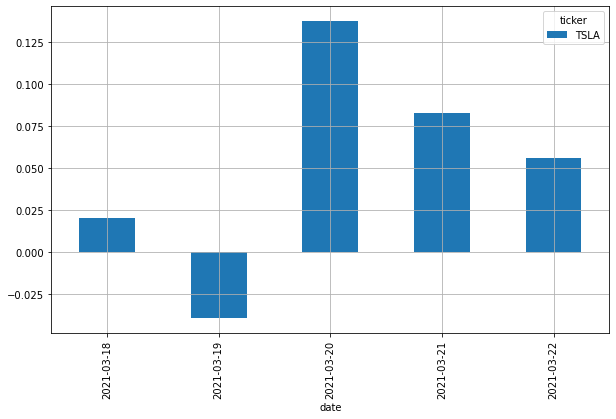

In [10]:
plt.rcParams['figure.figsize'] = [10, 6]

# Group by date and ticker columns from scored_news and calculate the mean
mean_scores = parsed_and_scored_news.groupby(['ticker','date']).mean()

# Unstack the column ticker
mean_scores = mean_scores.unstack()

# Get the cross-section of compound in the 'columns' axis
mean_scores = mean_scores.xs('compound', axis="columns").transpose()

# Plot a bar chart with pandas
mean_scores.plot(kind = 'bar')
plt.grid()

In [46]:
parsed_and_scored_news.date.unique()

array([datetime.date(2021, 3, 22), datetime.date(2021, 3, 21),
       datetime.date(2021, 3, 20), datetime.date(2021, 3, 19),
       datetime.date(2021, 3, 18)], dtype=object)

In [61]:
date = parsed_and_scored_news['date']

In [65]:
date1 =[]
for i in date:
    date1.append(i.strftime('%Y-%m-%d'))

In [67]:
parsed_and_scored_news['date'] = date1

In [70]:
finviz_headlines = pd.read_csv('data/finviz_headlines.csv')

In [71]:
finviz_headlines = pd.concat([finviz_headlines, parsed_and_scored_news], ignore_index=True)

In [74]:
finviz_headlines.drop_duplicates(subset=['headline'], inplace=True)
finviz_headlines.sort_values('date', inplace=True)

In [76]:
finviz_headlines.to_csv('data/finviz_headlines.csv', index=False)